In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from glob import glob
import pickle
from collections import Counter
import os
import math

In [2]:
ribo_seq_SRR='SRR1630830_multimap'
min_TPM=2
min_pass_count=90
normalized_max=math.inf
normalized_min=0
peak_raw_count_min=0
peak_raw_count_min_first300=0

In [3]:
print(os.getcwd())
os.chdir("./"+ribo_seq_SRR)
print(os.getcwd())

D:\sorf_models\model\tests
D:\sorf_models\model\tests\SRR1630830_multimap


In [4]:
with open(ribo_seq_SRR+'_filtered20_count_vectors_numpy_list.pkl','rb') as file:
    vectors=pickle.load(file)
with open(ribo_seq_SRR+'_filtered20_transcripts_list.pkl','rb') as file:
    transcripts=pickle.load(file)
filter=pd.read_csv('dominant_isoform_75_confidence.txt',sep='\t',header=0)
all_sums=np.array([sum(i) for i in vectors])

<AxesSubplot:ylabel='Count'>

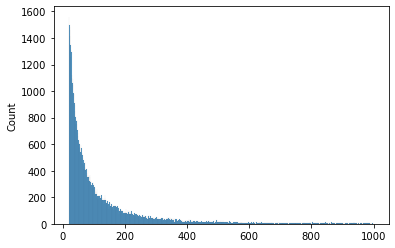

In [5]:
sns.histplot(data=np.array([i for i in all_sums if i<1000]),binwidth=1)

In [6]:
filter

,geneID,n,id,bootstrap_means,pass_count
0,ENSG00000000003.15,5,ENST00000373020.9,23.450820,0
1,ENSG00000000005.6,2,ENST00000373031.5,0.000000,100
2,ENSG00000000419.14,16,ENST00000371588.10,61.249970,0
3,ENSG00000000457.14,5,ENST00000367770.5,3.531276,0
4,ENSG00000000460.17,9,ENST00000413811.3,24.869729,0
...,...,...,...,...,...
60644,ENSG00000288721.1,3,ENST00000682596.1,0.349672,0
60645,ENSG00000288722.1,1,ENST00000610495.2,13.925232,100
60646,ENSG00000288723.1,1,ENST00000684005.1,0.118495,100
60647,ENSG00000288724.1,1,ENST00000683399.1,0.000000,100


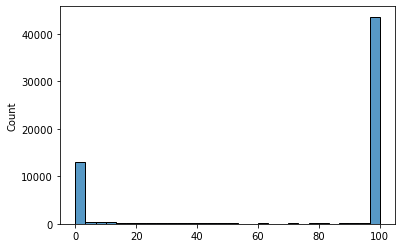

In [7]:
sns.histplot(data=filter.pass_count.values).get_figure().savefig('pass_count.pdf')

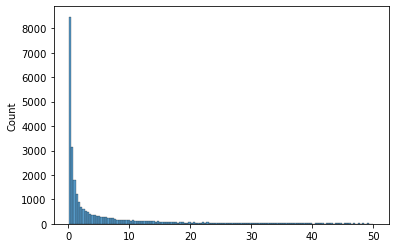

In [8]:
sns.histplot(data=[i for i in filter.bootstrap_means.values if (i<50) & (i>0.1)]).get_figure().savefig('TPM distribution 0.1-50.pdf')

In [9]:
filter2=filter[(filter.bootstrap_means>min_TPM) & (filter.pass_count>min_pass_count)]

In [10]:
filter2

,geneID,n,id,bootstrap_means,pass_count
7,ENSG00000001036.14,3,ENST00000002165.11,55.925077,100
13,ENSG00000001561.7,1,ENST00000321037.5,18.103808,100
17,ENSG00000001630.17,4,ENST00000003100.13,42.940697,95
61,ENSG00000004799.8,5,ENST00000005178.6,2.857295,92
66,ENSG00000004864.14,8,ENST00000265631.10,54.211422,100
...,...,...,...,...,...
60596,ENSG00000288662.1,1,ENST00000678483.1,2.630324,100
60601,ENSG00000288670.1,1,ENST00000437833.2,6.619350,100
60622,ENSG00000288699.1,1,ENST00000681845.1,11.498013,100
60632,ENSG00000288709.1,1,ENST00000369505.5,3.714412,100


In [11]:
#筛选出重合的转录本及其vector
filtered2_vectors=[vectors[i] for i in range(len(vectors)) if (transcripts[i] in filter2.id.values)]
filtered2_transcripts=[i for i in transcripts if (i in filter2.id.values)]

In [12]:
print(len(filtered2_vectors))
print(len(filtered2_transcripts))

2157
2157


In [13]:
normalized_vectors2=[filtered2_vectors[i]/filter2.bootstrap_means.values[filter2.id == filtered2_transcripts[i]] for i in range(len(filtered2_vectors))]

<AxesSubplot:ylabel='Count'>

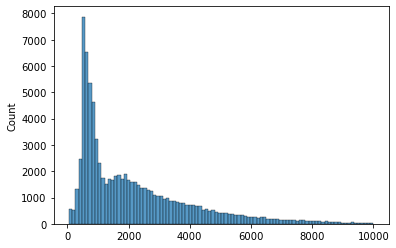

In [14]:
#所有ribo count > 20的转录本长度分布 
sns.histplot(data=np.array([len(i) for i in vectors if len(i)<10000]))

<AxesSubplot:ylabel='Count'>

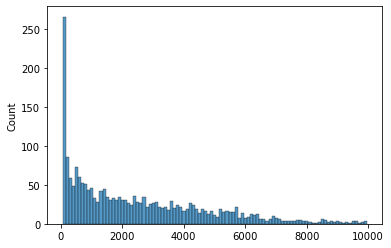

In [15]:
#用到的转录本长度分布（tpm > 1）
sns.histplot(data=np.array([len(i) for i in normalized_vectors2 if len(i)<10000]),binwidth=100)

In [16]:
normalized_vector_sums=[sum(i) for i in normalized_vectors2]

<AxesSubplot:ylabel='Count'>

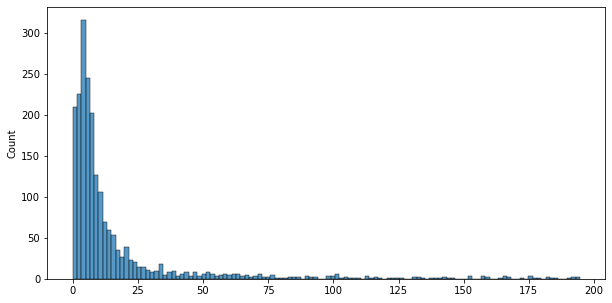

In [17]:
#用到的转录本标准化后ribo count合的分布
plt.figure(figsize = (10,5))
sns.histplot(data=np.array([i for i in normalized_vector_sums if i<200]))

In [18]:
plotdata={'transcript length': np.array([len(i) for i in normalized_vectors2 if len(i)<10000]),\
         'read count': np.array([sum(i) for i in normalized_vectors2 if len(i)<10000])}
plotdata=pd.DataFrame(plotdata)

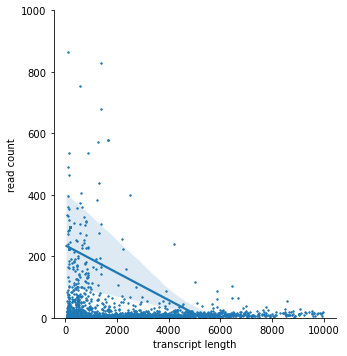

In [19]:
sns.lmplot(data=plotdata,x='transcript length',y='read count',scatter_kws={"s": 2, "alpha": 1}).set(ylim=(0, 1000))

In [20]:
#print([filtered2_transcripts[i] for i in range(len(filtered2_transcripts)) if sum(normalized_vectors2[i])>200])

In [21]:
meta=pd.read_csv('../gencode_transcript_meta.txt',sep='\t',header=None)
meta.columns=['ID','Parent','transcript_id','gene_id','gene_type','gene_name','transcript_type','transcript_name']
meta

,ID,Parent,transcript_id,gene_id,gene_type,gene_name,transcript_type,transcript_name
0,ENST00000456328.2,ENSG00000223972.5,ENST00000456328.2,ENSG00000223972.5,transcribed_unprocessed_pseudogene,DDX11L1,processed_transcript,DDX11L1-202
1,ENST00000450305.2,ENSG00000223972.5,ENST00000450305.2,ENSG00000223972.5,transcribed_unprocessed_pseudogene,DDX11L1,transcribed_unprocessed_pseudogene,DDX11L1-201
2,ENST00000488147.1,ENSG00000227232.5,ENST00000488147.1,ENSG00000227232.5,unprocessed_pseudogene,WASH7P,unprocessed_pseudogene,WASH7P-201
3,ENST00000619216.1,ENSG00000278267.1,ENST00000619216.1,ENSG00000278267.1,miRNA,MIR6859-1,miRNA,MIR6859-1-201
4,ENST00000473358.1,ENSG00000243485.5,ENST00000473358.1,ENSG00000243485.5,lncRNA,MIR1302-2HG,lncRNA,MIR1302-2HG-202
...,...,...,...,...,...,...,...,...
237007,ENST00000361681.2,ENSG00000198695.2,ENST00000361681.2,ENSG00000198695.2,protein_coding,MT-ND6,protein_coding,MT-ND6-201
237008,ENST00000387459.1,ENSG00000210194.1,ENST00000387459.1,ENSG00000210194.1,Mt_tRNA,MT-TE,Mt_tRNA,MT-TE-201
237009,ENST00000361789.2,ENSG00000198727.2,ENST00000361789.2,ENSG00000198727.2,protein_coding,MT-CYB,protein_coding,MT-CYB-201
237010,ENST00000387460.2,ENSG00000210195.2,ENST00000387460.2,ENSG00000210195.2,Mt_tRNA,MT-TT,Mt_tRNA,MT-TT-201


In [22]:
# print(sum(meta.ID != meta.transcript_id))
# print(sum(meta.Parent != meta.gene_id))

In [23]:
# Counter(meta.transcript_type.values)

In [24]:
#sum([i in meta.transcript_id.values for i in filtered2_transcripts])

In [25]:
#sum([i in meta.ID.values for i in filtered2_transcripts])#用ID进行mapping

In [26]:
used_meta=pd.DataFrame(data=filtered2_transcripts,columns=['ID']).merge(meta,on='ID',how='left')
used_meta

,ID,Parent,transcript_id,gene_id,gene_type,gene_name,transcript_type,transcript_name
0,ENST00000391079.1,ENSG00000277512.1,ENST00000391079.1,ENSG00000277512.1,snoRNA,SNORD65,snoRNA,SNORD65-201
1,ENST00000363533.1,ENSG00000200403.1,ENST00000363533.1,ENSG00000200403.1,snRNA,RNU6-1099P,snRNA,RNU6-1099P-201
2,ENST00000243056.5,ENSG00000123364.5,ENST00000243056.5,ENSG00000123364.5,protein_coding,HOXC13,protein_coding,HOXC13-201
3,ENST00000297338.7,ENSG00000164754.15,ENST00000297338.7,ENSG00000164754.15,protein_coding,RAD21,protein_coding,RAD21-201
4,ENST00000398583.3,ENSG00000256737.1,ENST00000398583.3,ENSG00000256737.1,processed_pseudogene,RBBP4P5,processed_pseudogene,RBBP4P5-201
...,...,...,...,...,...,...,...,...
2152,ENST00000384036.1,ENSG00000206763.1,ENST00000384036.1,ENSG00000206763.1,snRNA,RNU6-10P,snRNA,RNU6-10P-201
2153,ENST00000362507.1,ENSG00000199377.1,ENST00000362507.1,ENSG00000199377.1,snRNA,RNU5F-1,snRNA,RNU5F-1-201
2154,ENST00000492974.2,ENSG00000218426.5,ENST00000492974.2,ENSG00000218426.5,processed_pseudogene,RP11-475C16.1,processed_pseudogene,RP11-475C16.1-001
2155,ENST00000272444.7,ENSG00000144048.10,ENST00000272444.7,ENSG00000144048.10,protein_coding,DUSP11,protein_coding,DUSP11-201


In [27]:
# np.unique(used_meta.transcript_type.values)

In [28]:
# Counter(used_meta.transcript_type.values)

In [29]:
mapping={'processed_transcript': 'lncRNA',
         'transcribed_unprocessed_pseudogene': 'transcribed_pseudogene',
         'unprocessed_pseudogene': 'pseudogene',
         'miRNA': 'non-coding',
         'lncRNA': 'lncRNA',
         'protein_coding': 'protein_coding',
         'processed_pseudogene': 'pseudogene',
         'snRNA': 'non-coding',
         'transcribed_processed_pseudogene': 'transcribed_pseudogene',
         'retained_intron': 'others',
         'nonsense_mediated_decay': 'nonsense_mediated_decay',
         'misc_RNA': 'non-coding',
         'TEC': 'others',
         'transcribed_unitary_pseudogene': 'transcribed_pseudogene',
         'non_stop_decay': 'lncRNA',
         'snoRNA': 'non-coding',
         'scaRNA': 'non-coding',
         'rRNA_pseudogene': 'pseudogene',
         'unitary_pseudogene': 'pseudogene',
         'polymorphic_pseudogene': 'pseudogene',
         'pseudogene': 'pseudogene',
         'rRNA': 'non-coding',
         'IG_V_pseudogene': 'pseudogene',
         'scRNA': 'non-coding',
         'IG_V_gene': 'IG_gene',
         'IG_C_gene': 'IG_gene',
         'IG_J_gene': 'IG_gene',
         'sRNA': 'non-coding',
         'ribozyme': 'non-coding',
         'translated_processed_pseudogene': 'protein_coding',
         'vault_RNA': 'non-coding',
         'TR_C_gene': 'IG_gene',
         'TR_J_gene': 'IG_gene',
         'TR_V_gene': 'IG_gene',
         'TR_V_pseudogene': 'pseudogene',
         'translated_unprocessed_pseudogene': 'protein_coding',
         'TR_D_gene': 'IG_gene',
         'IG_C_pseudogene': 'pseudogene',
         'TR_J_pseudogene': 'pseudogene',
         'IG_J_pseudogene': 'pseudogene',
         'IG_D_gene': 'IG_gene',
         'IG_pseudogene': 'pseudogene',
         'Mt_tRNA': 'non-coding',
         'Mt_rRNA': 'non-coding'}

In [30]:
Counter(np.vectorize(mapping.get)(used_meta.transcript_type.values))

Counter({'non-coding': 342,
         'protein_coding': 1362,
         'pseudogene': 274,
         'nonsense_mediated_decay': 28,
         'lncRNA': 129,
         'transcribed_pseudogene': 11,
         'others': 11})

In [31]:
plotdata2={'Transcript length': np.array([len(i) for i in normalized_vectors2]),
           'Normalized read count': np.array([sum(i) for i in normalized_vectors2]),
           'Transcript type': np.vectorize(mapping.get)(used_meta.transcript_type.values)}
plotdata2=pd.DataFrame(plotdata2)
plotdata2

,Transcript length,Normalized read count,Transcript type
0,73,2.102751,non-coding
1,107,20.484251,non-coding
2,2357,9.319025,protein_coding
3,3660,7.161463,protein_coding
4,1266,58.271950,pseudogene
...,...,...,...
2152,107,864.415964,non-coding
2153,117,20.685504,non-coding
2154,447,101.016229,pseudogene
2155,1653,5.426943,protein_coding


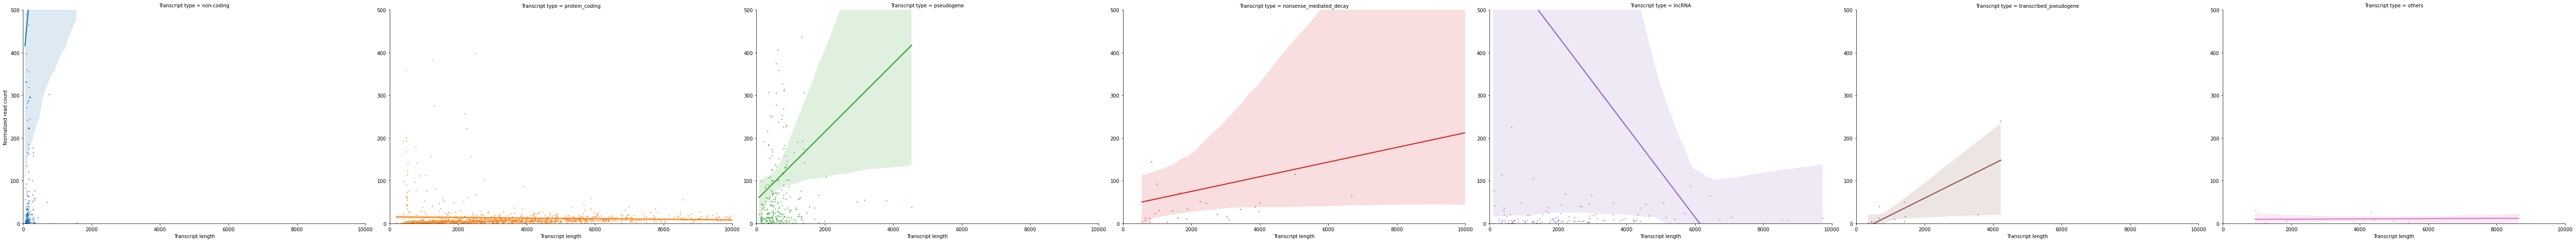

In [32]:
#加入meta后重新上色画图：
sns.lmplot(data=plotdata2,x='Transcript length',y='Normalized read count',scatter_kws={"s": 2, "alpha": 0.7},hue='Transcript type',col='Transcript type',height=7,aspect=1.5,facet_kws={'sharey': False}).set(xlim=(0,10000),ylim=(0,500)).savefig('normalized_read_count_vs_trans_len_divided_new2.pdf')

In [33]:
#non-coding应该删掉；protein-coding短的有很多高值，存在疑问，可能是非unique mapping导致，于是查看tpm与count关系：
plotdata3={'TPM': np.array([filter2.bootstrap_means.values[filter2.id.values == filtered2_transcripts[i]][0] for i in range(len(filtered2_vectors))]),
          'Ribo-seq read count': np.array([sum(i) for i in filtered2_vectors]),
          'Transcript type': np.vectorize(mapping.get)(used_meta.transcript_type.values),
          'Transcript length': np.array([len(i) for i in filtered2_vectors])}
plotdata3=pd.DataFrame(plotdata3)

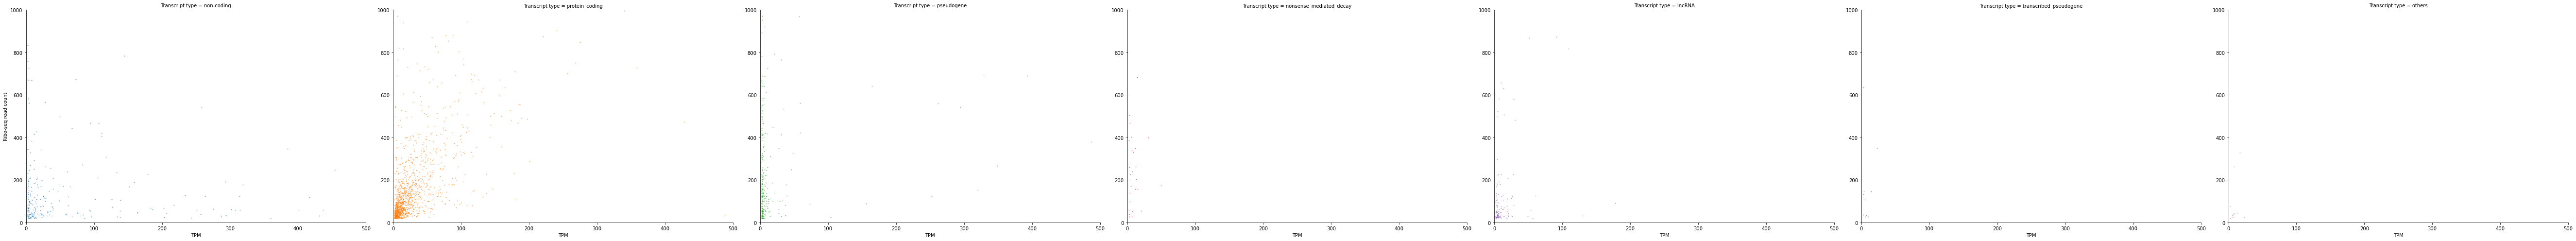

In [34]:
sns.lmplot(data=plotdata3,x='TPM',y='Ribo-seq read count',scatter_kws={"s": 1, "alpha": 0.5},fit_reg=False,height=7,aspect=1.5,hue='Transcript type',col='Transcript type',facet_kws={'sharex': False,'sharey': False}).set(xlim=(0,500),ylim=(0,1000)).savefig('raw_read_count_vs_TPM_divided_new.pdf')

In [35]:
#[used_meta[i:(i+1)] for i in range(len(normalized_vectors2)) if sum(normalized_vectors2[i])>500]

In [36]:
# used_meta[1050:1051]

In [37]:
# np.set_printoptions(threshold=1500)
# print(np.argmax(normalized_vectors2[1050]))

In [38]:
used_index_list=[i for i in range(len(filtered2_transcripts)) if ((np.max(filtered2_vectors[i]) >= peak_raw_count_min) & (np.max(filtered2_vectors[i][0:300]) >= peak_raw_count_min_first300) & (normalized_vector_sums[i]<normalized_max) & (normalized_vector_sums[i]>normalized_min) & (used_meta.transcript_type.values[i] in ["protein_coding","lncRNA"]))]
used_transcripts=[filtered2_transcripts[i] for i in used_index_list]
used_raw_vectors=[filtered2_vectors[i] for i in used_index_list]
used_vectors=[normalized_vectors2[i] for i in used_index_list]
used_meta1=used_meta.iloc[used_index_list]
used_vector_sums=[sum(i) for i in used_vectors]

In [39]:
print(len(used_transcripts))
print(len(used_vectors))
used_meta1

1451
1451


,ID,Parent,transcript_id,gene_id,gene_type,gene_name,transcript_type,transcript_name
2,ENST00000243056.5,ENSG00000123364.5,ENST00000243056.5,ENSG00000123364.5,protein_coding,HOXC13,protein_coding,HOXC13-201
3,ENST00000297338.7,ENSG00000164754.15,ENST00000297338.7,ENSG00000164754.15,protein_coding,RAD21,protein_coding,RAD21-201
5,ENST00000378825.5,ENSG00000151468.11,ENST00000378825.5,ENSG00000151468.11,protein_coding,CCDC3,protein_coding,CCDC3-201
6,ENST00000567078.2,ENSG00000260342.2,ENST00000567078.2,ENSG00000260342.2,protein_coding,RP11-1035H13.3,protein_coding,RP11-1035H13.3-001
7,ENST00000570054.3,ENSG00000260914.3,ENST00000570054.3,ENSG00000260914.3,protein_coding,RP11-343C2.11,protein_coding,RP11-343C2.11-001
...,...,...,...,...,...,...,...,...
2148,ENST00000368222.8,ENSG00000143320.9,ENST00000368222.8,ENSG00000143320.9,protein_coding,CRABP2,protein_coding,CRABP2-203
2149,ENST00000253063.4,ENSG00000130766.5,ENST00000253063.4,ENSG00000130766.5,protein_coding,SESN2,protein_coding,SESN2-201
2150,ENST00000228515.6,ENSG00000110925.7,ENST00000228515.6,ENSG00000110925.7,protein_coding,CSRNP2,protein_coding,CSRNP2-201
2155,ENST00000272444.7,ENSG00000144048.10,ENST00000272444.7,ENSG00000144048.10,protein_coding,DUSP11,protein_coding,DUSP11-201


In [40]:
# np.unique(used_meta1.transcript_type.values)

In [41]:
with open('summary.txt','w') as file:
    print('used transcript count: '+str(len(used_transcripts)),file=file)
    print('mRNA count: '+str(sum(np.vectorize(mapping.get)(used_meta1.transcript_type.values)=='protein_coding')),file=file)
    print('lncRNA count: '+str(sum(np.vectorize(mapping.get)(used_meta1.transcript_type.values)=='lncRNA')),file=file)
    print('transcript count after first filter: '+str(len(filtered2_vectors)),file=file)
    print('TPM minimum cutoff: '+str(min_TPM),file=file)
    print('minimum pass count: '+str(min_pass_count),file=file)
    print('ribo-seq sum raw read count minimum cutoff: 20',file=file)
    print('ribo-seq peak raw read count minimum cutoff: '+str(peak_raw_count_min),file=file)
    print('ribo-seq first 300 nucleotides peak raw read count minimum cutoff: '+str(peak_raw_count_min_first300),file=file)
    print('normalized read counts minimum cutoff: '+str(normalized_min),file=file)
    print('normalized read counts maximum cutoff: '+str(normalized_max),file=file)
    print('used transcript mean normalized read counts: '+str(np.mean(used_vector_sums)),file=file)
used_meta1.to_csv('used_transcripts_meta.txt',sep='\t',index=False)

In [42]:
plotdata_used={'Transcript length': np.array([len(i) for i in used_vectors]),
           'Normalized read count': np.array([sum(i) for i in used_vectors]),
           'Transcript type': np.vectorize(mapping.get)(used_meta1.transcript_type.values)}
plotdata_used=pd.DataFrame(plotdata_used)
plotdata_used

,Transcript length,Normalized read count,Transcript type
0,2357,9.319025,protein_coding
1,3660,7.161463,protein_coding
2,2747,1.646129,protein_coding
3,764,178.724627,protein_coding
4,1284,7.703001,protein_coding
...,...,...,...
1446,974,7.009834,protein_coding
1447,3462,10.601009,protein_coding
1448,4517,5.395715,protein_coding
1449,1653,5.426943,protein_coding


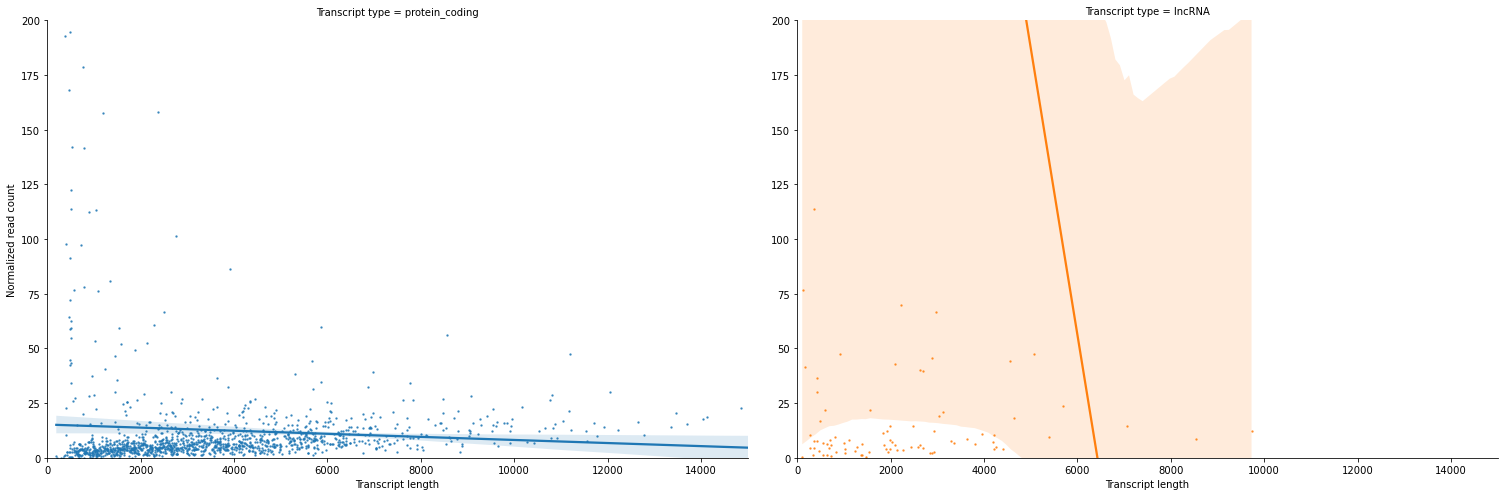

In [43]:
sns.lmplot(data=plotdata_used,x='Transcript length',y='Normalized read count',scatter_kws={"s": 2, "alpha": 0.7},hue='Transcript type',col='Transcript type',height=7,aspect=1.5,facet_kws={'sharey': False}).set(xlim=(0,15000),ylim=(0,200)).savefig('used_transcripts_normalized_read_count_vs_trans_len_divided.pdf')

In [ ]:
plotdata_used={'TPM': np.array([filter2.bootstrap_means.values[filter2.id.values == used_transcripts[i]][0] for i in range(len(used_vectors))]),
          'Raw ribo-seq read count': np.array([sum(filtered2_vectors[i]) for i in used_index_list]),
          'Transcript type': np.vectorize(mapping.get)(used_meta1.transcript_type.values),
          'Transcript length': np.array([len(i) for i in used_vectors])}
plotdata_used=pd.DataFrame(plotdata_used)
sns.lmplot(data=plotdata_used,x='TPM',y='Raw ribo-seq read count',scatter_kws={"s": 1, "alpha": 0.5},fit_reg=False,height=7,aspect=1.5,hue='Transcript type',col='Transcript type',facet_kws={'sharex': False,'sharey': False}).set(xlim=(0,500),ylim=(0,1000)).savefig('used_transcripts_raw_read_count_vs_TPM_divided.pdf')

In [ ]:
with open('used_transcripts.pkl','wb') as file:
    pickle.dump(used_transcripts, file)
with open('used_raw_vectors.pkl','wb') as file:
    pickle.dump(used_raw_vectors, file)
with open('used_vectors.pkl','wb') as file:
    pickle.dump(used_vectors, file)
with open('used_TPMs.pkl','wb') as file:
    pickle.dump(np.array([filter2.bootstrap_means.values[filter2.id.values == used_transcripts[i]][0] for i in range(len(used_vectors))]),file)